In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan path ke file CSV benar
file_path = "C:/Users/user/Documents/Kuliah_ses4/mesin/BBCA.JK.csv"

# Periksa apakah file ada
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Membaca data dari CSV
data = pd.read_csv(file_path)

# Memeriksa 5 baris pertama data
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,9400.0,9425.0,9350.0,9425.0,9212.704102,30545200
1,2024-01-03,9425.0,9425.0,9325.0,9350.0,9139.393555,34603300
2,2024-01-04,9400.0,9475.0,9375.0,9475.0,9261.578125,56501800
3,2024-01-05,9500.0,9600.0,9475.0,9575.0,9359.325195,85290100
4,2024-01-08,9600.0,9625.0,9475.0,9575.0,9359.325195,50896000


In [23]:
# Memeriksa informasi tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       97 non-null     object 
 1   Open       97 non-null     float64
 2   High       97 non-null     float64
 3   Low        97 non-null     float64
 4   Close      97 non-null     float64
 5   Adj Close  97 non-null     float64
 6   Volume     97 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.4+ KB


In [24]:
# Mengonversi kolom 'Date' menjadi tipe datetime dan mengurutkan berdasarkan tanggal
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
print(data.head())

        Date    Open    High     Low   Close    Adj Close    Volume
0 2024-01-02  9400.0  9425.0  9350.0  9425.0  9212.704102  30545200
1 2024-01-03  9425.0  9425.0  9325.0  9350.0  9139.393555  34603300
2 2024-01-04  9400.0  9475.0  9375.0  9475.0  9261.578125  56501800
3 2024-01-05  9500.0  9600.0  9475.0  9575.0  9359.325195  85290100
4 2024-01-08  9600.0  9625.0  9475.0  9575.0  9359.325195  50896000


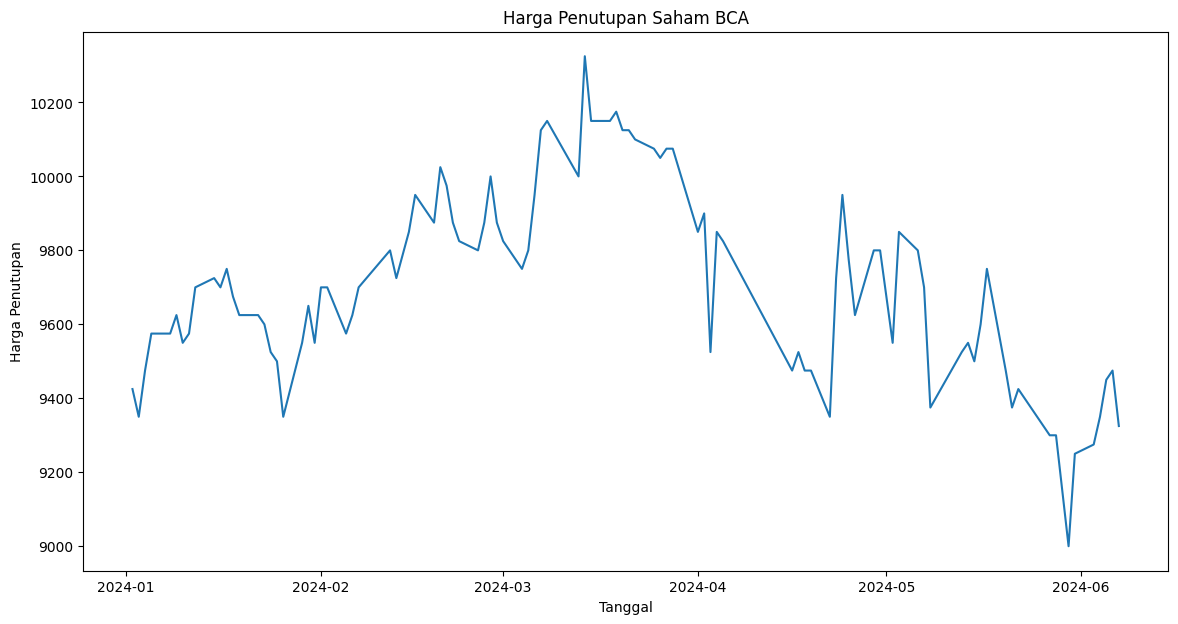

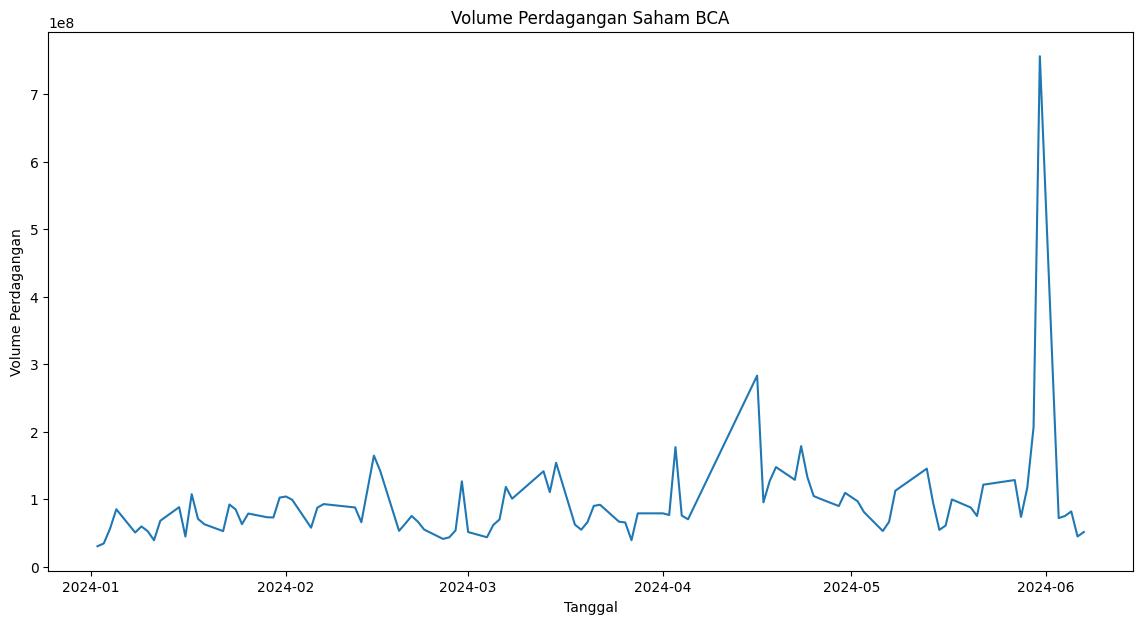

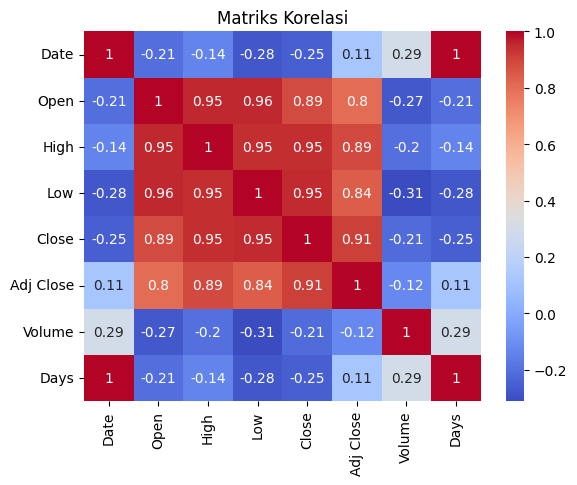

In [25]:
# Membuat kolom 'Days' sebagai jumlah hari dari tanggal awal data
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Plot harga penutupan saham
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'])
plt.title('Harga Penutupan Saham BCA')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.show()

# Plot volume perdagangan
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volume'])
plt.title('Volume Perdagangan Saham BCA')
plt.xlabel('Tanggal')
plt.ylabel('Volume Perdagangan')
plt.show()

# Statistik deskriptif
data.describe()

# Korelasi antara variabel
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

In [26]:
# Memisahkan fitur dan target
X = data[['Days', 'Volume', 'Open', 'High', 'Low']]  # Contoh fitur
y = data['Close']

# Menampilkan bentuk dari fitur dan target
print(f'Bentuk fitur X: {X.shape}')
print(f'Bentuk target y: {y.shape}')


Bentuk fitur X: (97, 5)
Bentuk target y: (97,)


In [27]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran set pelatihan dan pengujian
print(f'Ukuran data pelatihan: {X_train.shape[0]} samples')
print(f'Ukuran data pengujian: {X_test.shape[0]} samples')


Ukuran data pelatihan: 77 samples
Ukuran data pengujian: 20 samples


In [28]:
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan koefisien dan intersep model
print(f'Koefisien: {model.coef_}')
print(f'Intersep: {model.intercept_}')


Koefisien: [-2.28714798e-01  1.40836536e-07 -7.16908427e-01  7.68197049e-01
  9.50472636e-01]
Intersep: 6.656154026450167


In [29]:
# Pastikan kolom 'Date' ada dalam X_test dan disimpan di DataFrame asli
# Menambahkan kolom 'Date' ke data pengujian
X_test_with_date = X_test.copy()
X_test_with_date['Date'] = data.loc[X_test.index, 'Date'].values

# Memprediksi harga saham
y_pred = model.predict(X_test)

# Membuat DataFrame untuk hasil
results = pd.DataFrame({
    'Date': X_test_with_date['Date'],
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Menampilkan beberapa contoh hasil
print(results.head())


         Date  Actual    Predicted
62 2024-04-05  9825.0  9843.791318
40 2024-03-01  9825.0  9842.012078
93 2024-06-04  9350.0  9357.489814
18 2024-01-26  9350.0  9372.208300
81 2024-05-15  9500.0  9505.984237


In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Menentukan tanggal yang akan diprediksi
tanggal_prediksi = pd.to_datetime('2024-08-15')
print(f"Tanggal yang akan diprediksi: {tanggal_prediksi}")

# Menghitung jumlah hari dari tanggal awal data ke tanggal yang akan diprediksi
tanggal_awal = data['Date'].min()
days_pilih = (tanggal_prediksi - tanggal_awal).days

# Estimasi atau asumsi nilai fitur untuk tanggal yang akan diprediksi
volume_prediksi = data['Volume'].mean()
open_prediksi = data['Open'].mean()
high_prediksi = data['High'].mean()
low_prediksi = data['Low'].mean()

# Membuat DataFrame untuk tanggal yang akan diprediksi
X_prediksi = pd.DataFrame({
    'Days': [days_pilih],
    'Volume': [volume_prediksi],
    'Open': [open_prediksi],
    'High': [high_prediksi],
    'Low': [low_prediksi]
})

# Memprediksi harga saham untuk tanggal yang akan diprediksi
y_prediksi = model.predict(X_prediksi)

# Menampilkan hasil prediksi
print(f"Prediksi harga saham untuk {tanggal_prediksi}: {y_prediksi[0]}")


Tanggal yang akan diprediksi: 2024-08-15 00:00:00
Prediksi harga saham untuk 2024-08-15 00:00:00: 9665.320249908817


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1843.8497693655038
R-squared: 0.9734046144465096


In [32]:
from sklearn.model_selection import cross_val_score

# Validasi silang model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

Cross-Validation MSE: 2622.7079174713135
